### Import configuration and data.

In [5]:
%cd /home/xlluo/hdd/ML-fracture

/home/xlluo/hdd/ML-fracture


In [10]:
%load_ext autoreload
%autoreload 2

from src.core.trainer import *

trainer = load_trainer(path='output/Upwind_avg_fatigue/base_Upwind_avg_fatigue/trainer.pkl')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Training

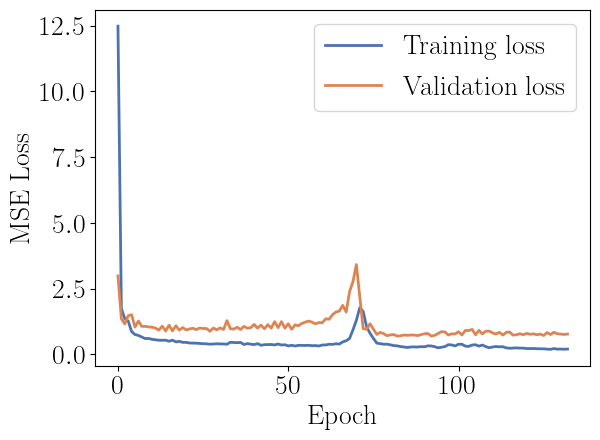

In [12]:
trainer.plot_loss(trainer._get_modelbase('ThisWork').train_ls, trainer._get_modelbase('ThisWork').val_ls)

### Plotting predictions and comparing with baseline models.

ThisWork 1/1
Training Loss: 0.2927, R2: 0.8013
Validation Loss: 0.6987, R2: 0.5682
Testing Loss: 0.8657, R2: 0.3558


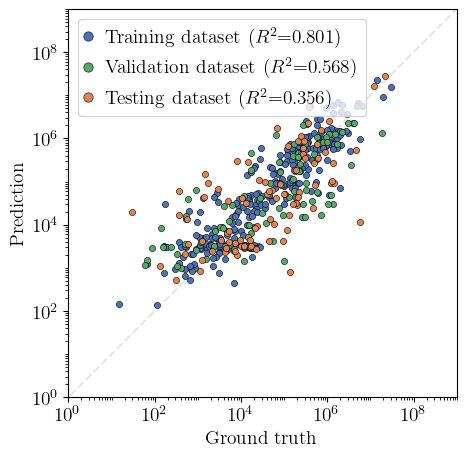

In [15]:
trainer.plot_truth_pred(program='ThisWork', log_trans=True, upper_lim=9)

### Permutation feature importance

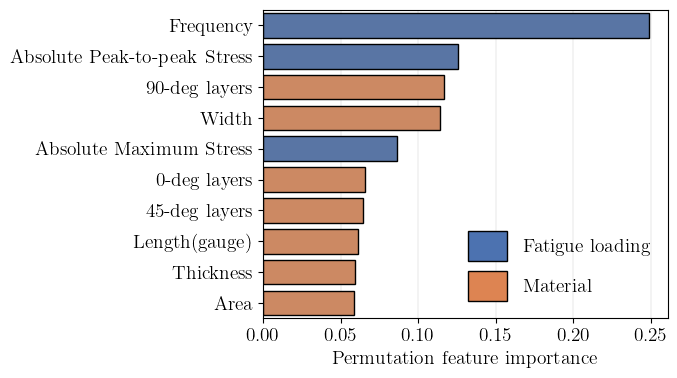

In [19]:
trainer.plot_feature_importance(trainer._get_modelbase('ThisWork'))

### Partial dependence

Calculate PDP:  Thickness
Calculate PDP:  Width
Calculate PDP:  Area
Calculate PDP:  Length(gauge)
Calculate PDP:  Frequency
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  0-deg layers
Calculate PDP:  45-deg layers
Calculate PDP:  90-deg layers


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xlluo/hdd/ML-fracture/src/utils/utils.py:265: UserWarning: Attempting to set identical left == right == -0.2156655490398407 results in singular transformations; automatically expanding.
  )


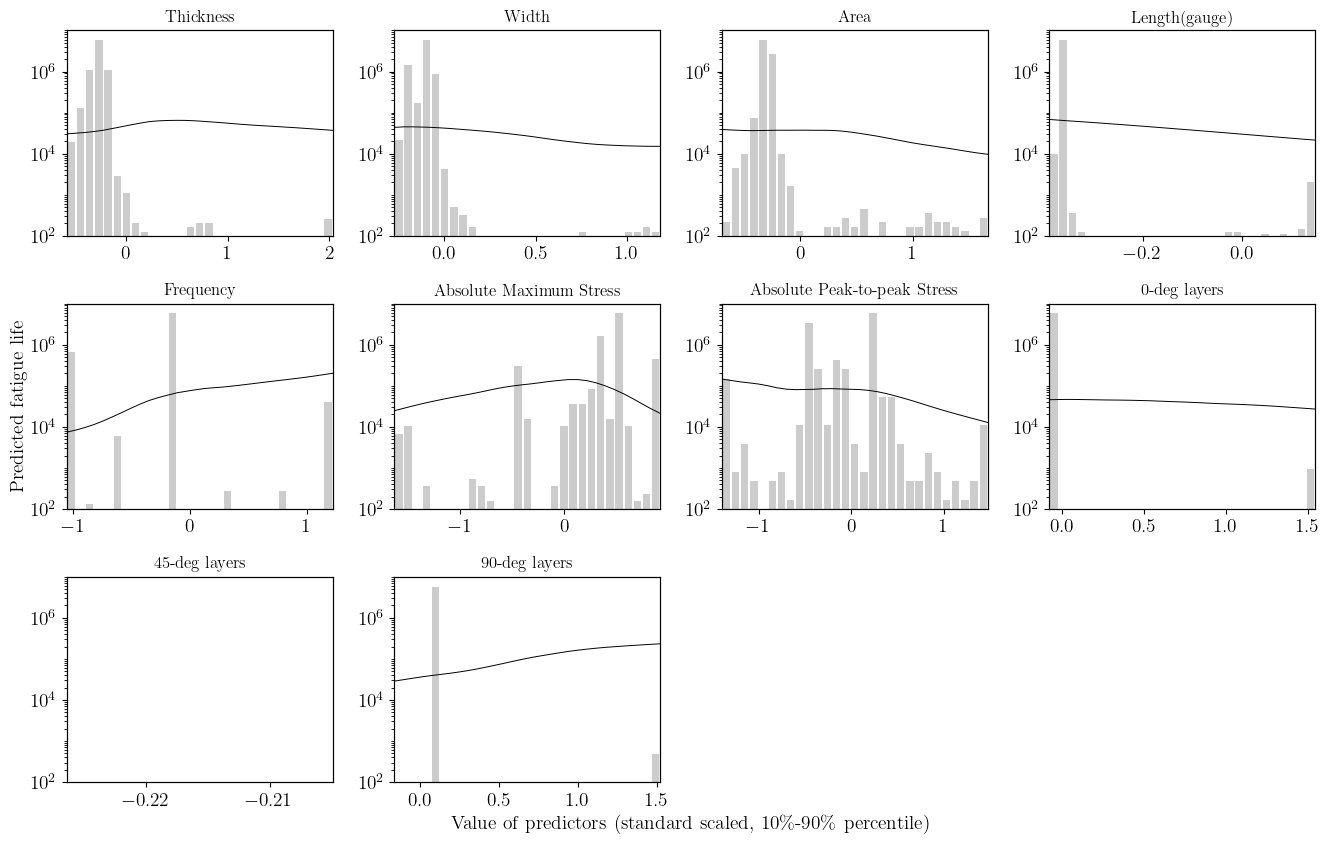

In [20]:
trainer.plot_partial_dependence(trainer._get_modelbase('ThisWork'), log_trans=True, lower_lim=2, upper_lim=7)

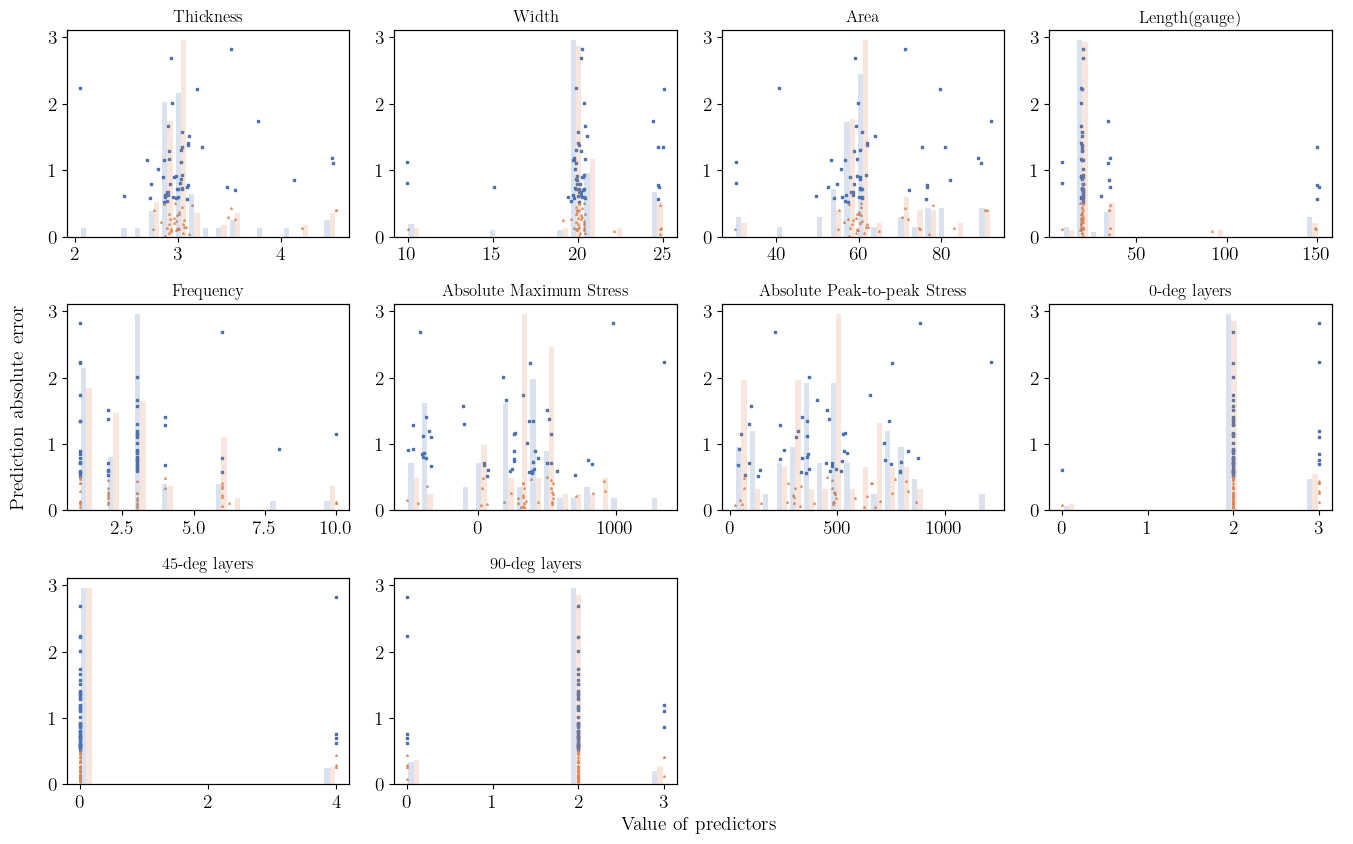

In [21]:
trainer.plot_partial_err(trainer._get_modelbase('ThisWork'), 0.5)

## Baseline models

In [22]:
trainer.get_leaderboard(test_data_only=False)

AutoGluon metrics
ThisWork metrics


,Program,Model,Training RMSE,Training MSE,Training MAE,Training MAPE,Training R2,Testing RMSE,Testing MSE,Testing MAE,Testing MAPE,Testing R2,Validation RMSE,Validation MSE,Validation MAE,Validation MAPE,Validation R2
0,AutoGluon,WeightedEnsemble_L2,0.055632,0.003095,0.040058,0.010904,0.997899,0.792047,0.627339,0.551718,0.141133,0.533192,0.760269,0.578009,0.597846,0.159966,0.642755
1,AutoGluon,KNeighborsDist_BAG_L1/T0,0.000000,0.000000,0.000000,0.000000,1.000000,0.810170,0.656376,0.558686,0.141807,0.511585,0.763926,0.583583,0.599663,0.159645,0.639310
2,AutoGluon,ExtraTreesMSE_BAG_L1/T0,0.274149,0.075157,0.208598,0.054446,0.948973,0.816019,0.665887,0.635824,0.161735,0.504508,0.870692,0.758105,0.684878,0.181821,0.531444
3,AutoGluon,CatBoost_BAG_L1/T0,0.305060,0.093061,0.236401,0.060317,0.936817,0.817448,0.668222,0.641284,0.163311,0.502771,0.884612,0.782538,0.696303,0.184596,0.516343
4,AutoGluon,XGBoost_BAG_L1/T0,0.282062,0.079559,0.213692,0.051551,0.945984,0.823026,0.677372,0.652843,0.164841,0.495962,0.868471,0.754243,0.682420,0.177380,0.533831
5,AutoGluon,LightGBMLarge_BAG_L1,0.347575,0.120808,0.261821,0.069683,0.917979,0.840592,0.706595,0.661923,0.168838,0.474217,0.920625,0.847551,0.726040,0.193206,0.476161
6,AutoGluon,NeuralNetMXNet_BAG_L1/T0,0.537577,0.288989,0.369557,0.102671,0.803795,0.844096,0.712498,0.643555,0.175338,0.469824,0.920076,0.846541,0.702117,0.193534,0.476786
7,AutoGluon,KNeighborsUnif_BAG_L1/T0,0.657660,0.432516,0.485520,0.127175,0.706350,0.863537,0.745695,0.611672,0.157517,0.445122,0.827501,0.684758,0.673376,0.176707,0.576777
8,AutoGluon,RandomForestMSE_BAG_L1/T0,0.294141,0.086519,0.224060,0.058921,0.941259,0.864112,0.746689,0.677225,0.171807,0.444383,0.922215,0.850481,0.723046,0.194221,0.474350
9,AutoGluon,LightGBMXT_BAG_L1/T0,0.653341,0.426854,0.517008,0.133903,0.710194,0.881351,0.776780,0.712250,0.179955,0.421992,0.936094,0.876272,0.764661,0.201598,0.458410


In [23]:
trainer.plot_truth_pred(program='PytorchTabular', upper_lim=9)

Exception: Program PytorchTabular not added to the trainer.

WeightedEnsemble_L2 1/12
KNeighborsDist_BAG_L1/T0 2/12
ExtraTreesMSE_BAG_L1/T0 3/12
CatBoost_BAG_L1/T0 4/12
XGBoost_BAG_L1/T0 5/12
LightGBMLarge_BAG_L1 6/12
NeuralNetMXNet_BAG_L1/T0 7/12
KNeighborsUnif_BAG_L1/T0 8/12
RandomForestMSE_BAG_L1/T0 9/12
LightGBMXT_BAG_L1/T0 10/12
NeuralNetFastAI_BAG_L1/T0 11/12
LightGBM_BAG_L1/T0 12/12
WeightedEnsemble_L2 1/12
Training Loss: 0.0031, R2: 0.9979
Validation Loss: 0.5780, R2: 0.6428
Testing Loss: 0.6273, R2: 0.5332


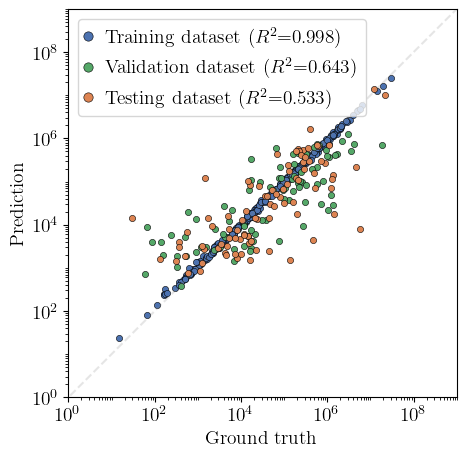

KNeighborsDist_BAG_L1/T0 2/12
Training Loss: 0.0000, R2: 1.0000
Validation Loss: 0.5836, R2: 0.6393
Testing Loss: 0.6564, R2: 0.5116


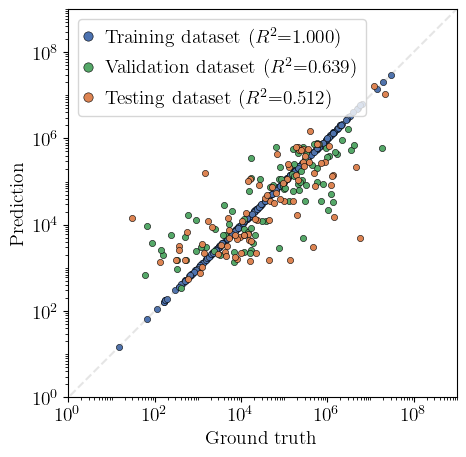

ExtraTreesMSE_BAG_L1/T0 3/12
Training Loss: 0.0752, R2: 0.9490
Validation Loss: 0.7581, R2: 0.5314
Testing Loss: 0.6659, R2: 0.5045


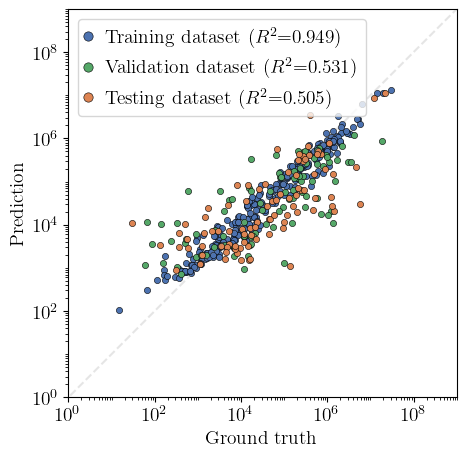

CatBoost_BAG_L1/T0 4/12
Training Loss: 0.0931, R2: 0.9368
Validation Loss: 0.7825, R2: 0.5163
Testing Loss: 0.6682, R2: 0.5028


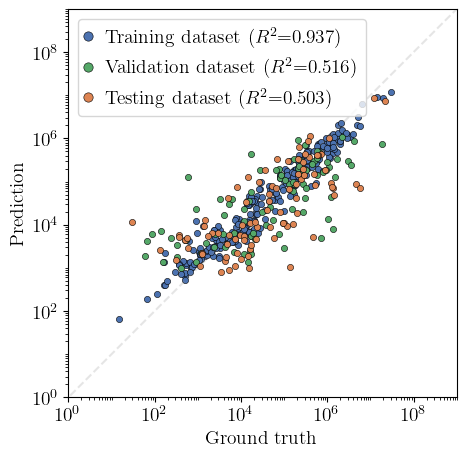

XGBoost_BAG_L1/T0 5/12
Training Loss: 0.0796, R2: 0.9460
Validation Loss: 0.7542, R2: 0.5338
Testing Loss: 0.6774, R2: 0.4960


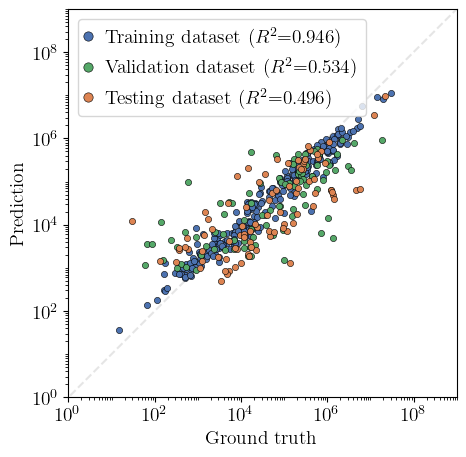

LightGBMLarge_BAG_L1 6/12
Training Loss: 0.1208, R2: 0.9180
Validation Loss: 0.8476, R2: 0.4762
Testing Loss: 0.7066, R2: 0.4742


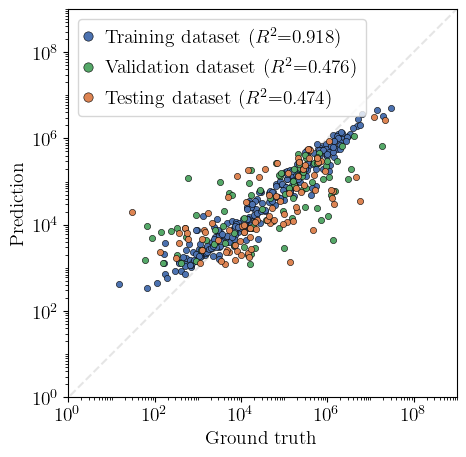

NeuralNetMXNet_BAG_L1/T0 7/12
Training Loss: 0.2890, R2: 0.8038
Validation Loss: 0.8465, R2: 0.4768
Testing Loss: 0.7125, R2: 0.4698


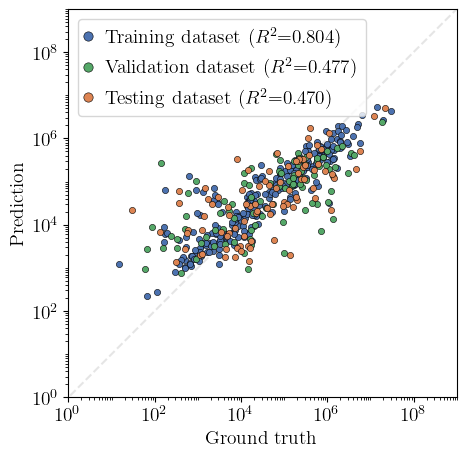

KNeighborsUnif_BAG_L1/T0 8/12
Training Loss: 0.4325, R2: 0.7063
Validation Loss: 0.6848, R2: 0.5768
Testing Loss: 0.7457, R2: 0.4451


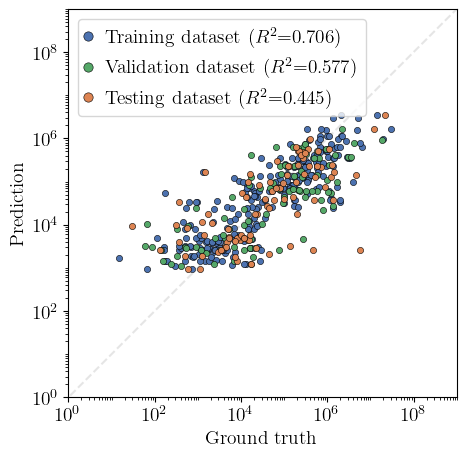

RandomForestMSE_BAG_L1/T0 9/12
Training Loss: 0.0865, R2: 0.9413
Validation Loss: 0.8505, R2: 0.4744
Testing Loss: 0.7467, R2: 0.4444


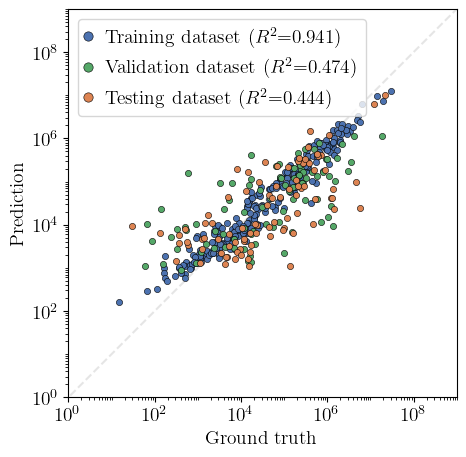

LightGBMXT_BAG_L1/T0 10/12
Training Loss: 0.4269, R2: 0.7102
Validation Loss: 0.8763, R2: 0.4584
Testing Loss: 0.7768, R2: 0.4220


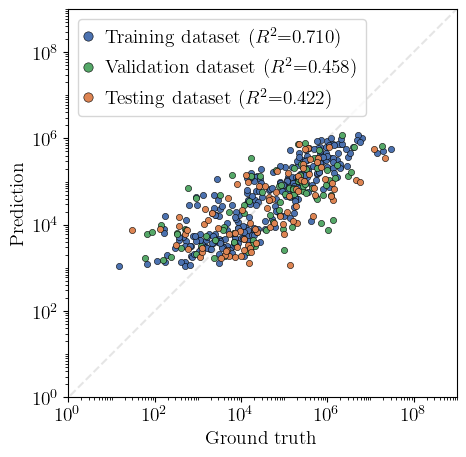

NeuralNetFastAI_BAG_L1/T0 11/12
Training Loss: 0.5216, R2: 0.6459
Validation Loss: 0.8204, R2: 0.4929
Testing Loss: 0.7830, R2: 0.4174


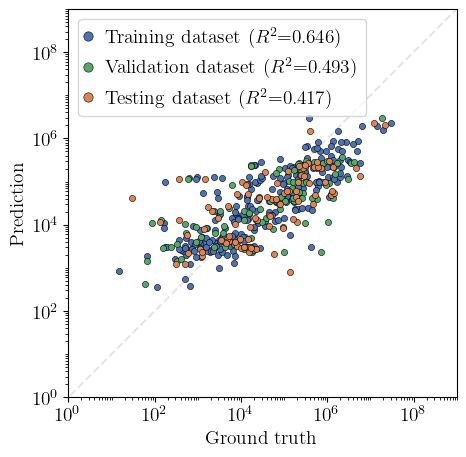

LightGBM_BAG_L1/T0 12/12
Training Loss: 0.3451, R2: 0.7657
Validation Loss: 0.8899, R2: 0.4500
Testing Loss: 0.7927, R2: 0.4102


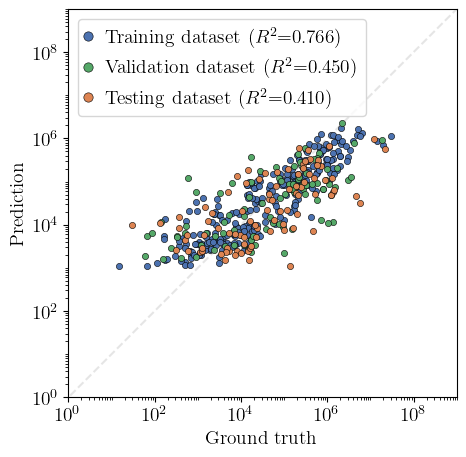

In [25]:
trainer.plot_truth_pred(program='AutoGluon', upper_lim=9)